# Linear Regression Example
This notebook demonstrates a linear regression example with randomly generated data.

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Creating a random dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Creating a DataFrame
data = pd.DataFrame(np.hstack((X, y)), columns=["Feature", "Target"])
data.head()


,Feature,Target
0,0.749080,6.334288
1,1.901429,9.405278
2,1.463988,8.483724
3,1.197317,5.604382
4,0.312037,4.716440


## Data Split
Splitting the data into training and testing sets.

In [2]:

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[["Feature"]], data["Target"], test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((80, 1), (20, 1), (80,), (20,))

## Model Training
Training the linear regression model on the training data.

In [3]:

# Initializing and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


## Model Evaluation
Evaluating the model using mean squared error and R-squared metrics.

In [4]:

# Calculating metrics
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Displaying metrics
metrics = {
    "MSE Train": mse_train,
    "R2 Train": r2_train,
    "MSE Test": mse_test,
    "R2 Test": r2_test
}

metrics_df = pd.DataFrame(metrics, index=[0])
metrics_df


,MSE Train,R2 Train,MSE Test,R2 Test
0,0.847679,0.758238,0.6537,0.807206


## Data Visualization
Plotting the training and testing data along with the regression line.

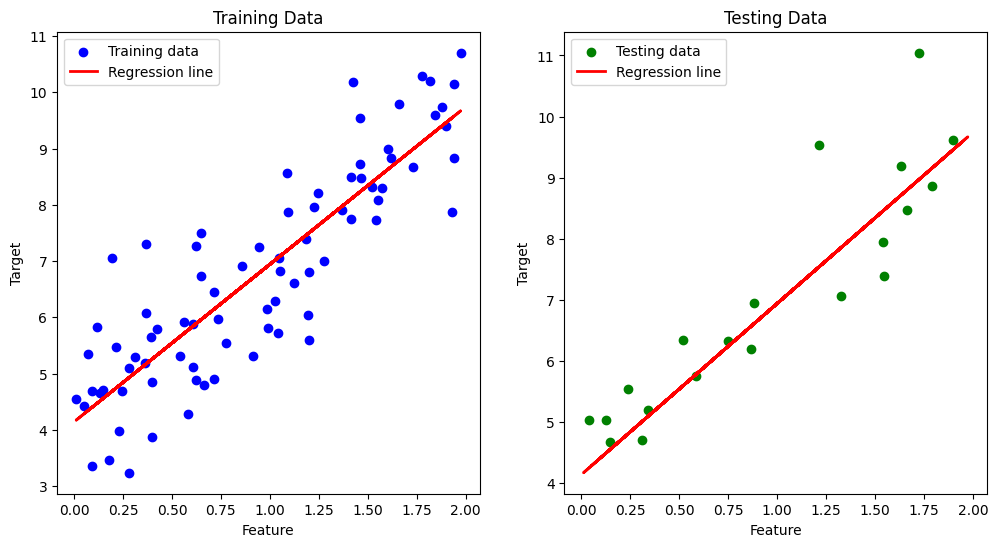

In [5]:

# Plotting the data and the regression line
plt.figure(figsize=(12, 6))

# Training data
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, y_pred_train, color='red', linewidth=2, label='Regression line')
plt.title('Training Data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

# Testing data
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green', label='Testing data')
plt.plot(X_train, y_pred_train, color='red', linewidth=2, label='Regression line')
plt.title('Testing Data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

plt.show()
